In [13]:
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from cycler import cycler

In [48]:
pgf_with_latex = {
    # # LaTeX default is 10pt font.
    "text.usetex": True,
    # # setup matplotlib to use latex for output
    "pgf.texsystem": "xelatex",
    # use LaTeX to write all text
    'text.latex.unicode': True,
    "font.family": "DejaVu Sans",
    "font.serif": [],
    # # blank entries should cause plots to inherit fonts from the document
    # "font.sans-serif": [],
    # "font.monospace": [],
    'path.simplify': True,
    'path.simplify_threshold': 0.1,
    'legend.markerscale': .9,
    'legend.numpoints': 1,
    'legend.handlelength': 2,
    'legend.scatterpoints': 1,
    'legend.labelspacing': 0.5,
    'legend.facecolor': '#eff0f1',
    'legend.edgecolor': 'none',
    'legend.handletextpad': 0.5,  # pad between handle and text
    'legend.borderaxespad': 0.5,  # pad between legend and axes
    'legend.borderpad': 0.5,  # pad between legend and legend content
    'legend.columnspacing': 1,  # pad between each legend column
    'axes.spines.left': True,
    'axes.spines.top': True,
    'axes.titlesize': 'large',
    'axes.spines.bottom': True,
    'axes.spines.right': True,
    'axes.axisbelow': True,
    'axes.grid': True,
    'image.cmap': 'RdYlBu',
    'grid.linewidth': 0.5,
    'grid.linestyle': '-',
    'grid.alpha': .6,
    'lines.linewidth': 1,
    'lines.markersize': 4,
    'lines.markeredgewidth': 1,
    'pgf.preamble': [
        r'\usepackage[utf8x]{inputenc}',
        r'\usepackage[T1]{fontenc}',
        r'\usepackage{{{typeface}}}'
    ]
}
mpl.rcParams.update(pgf_with_latex)

In [49]:
with open("final_project_dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)
df = pd.DataFrame(data_dict).T

In [50]:
financial = ['deferral_payments', 'total_payments', 'loan_advances',
              'restricted_stock_deferred', 'deferred_income', 'total_stock_value',
              'expenses', 'exercised_stock_options', 'other', 'long_term_incentive',
              'restricted_stock', 'director_fees','salary', 'total_payments', 'bonus']

sr = [
    'salary',
    'total_payments',
    'long_term_incentive',
    'expenses',
    'bonus'
    ]
neg = ['deferred_income']
email = ['to_messages', 'from_poi_to_this_person', 'from_messages',
         'from_this_person_to_poi', 'shared_receipt_with_poi']


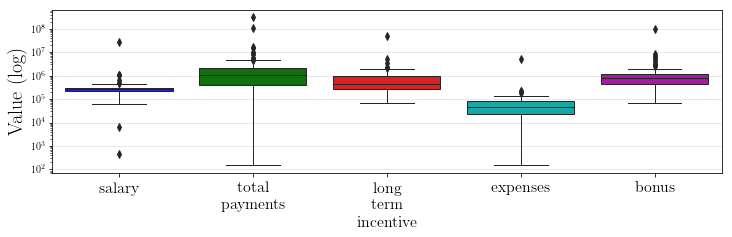

In [56]:
f, ax = plt.subplots(figsize=(12, 3))
ax.set_yscale("log")
sns.boxplot(data=df[sr].astype(np.float))
label = ['\n'.join(x.split('_')) for x in sr]
ax.set_xticklabels(label, fontsize=16)
ax.set_ylabel('Value (log)', fontsize=20)
f.savefig('img1.pdf', bbox_inches='tight')

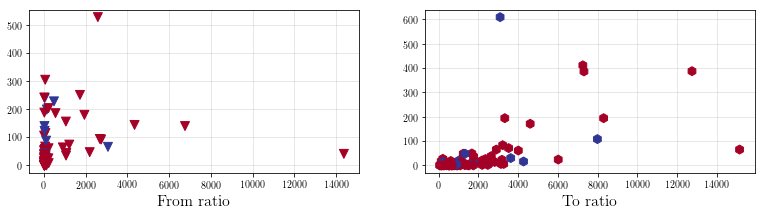

In [55]:
plt.figure(figsize=(13,3))
plt.subplot(121).set_xlabel("From ratio", fontsize=16)
plt.scatter(df['from_messages'], df['from_poi_to_this_person'], c=df['poi'], s=80, marker='v')
plt.subplot(122).set_xlabel("To ratio", fontsize=16)
plt.scatter(df['to_messages'], df['from_this_person_to_poi'], c=df['poi'], s=80, marker='h')
plt.savefig('img2.pdf', bbox_inches='tight')